Ecosystem
==========

pip
----------
- Windows
  - conda install package
  - pip install package
- Linux et Mac
  - pip install --user package
  
  
Numpy (+scipy)
--------------
http://mathesaurus.sourceforge.net/matlab-python-xref.pdf

Numpy :
- ```dtype``` : numerical precision (double by default)
- ```ndarray``` : an array of a unique dtype unique **much** faster than the python lists
- **mutable**
- indexing and slicing : It's possible to use 
  - a list of integers per dimensions
  - an array of index
  - an array of boolean (mask)
- ```shape```
- creation :
  - ```empty``` : fast allocation but without initialization
  - ```zeros```, ```zeros_like```, ```ones```, ```ones_like``` : allocataion and initialization with 0 or 1
  - ```arange(start, end, step)```
  - ```linspace(start, end, nb of points)```
  - ```meshgrid``` : mesh
- matrix product : ```@```
- **A lot** of packages use this data structure
- use ```&``` and ```|``` instead of ```and``` and ```or```
- Some usefull functions
  - ```linalg.eigvals``` : eigen values
  - ```linalg.det``` : determinent
  - ```linalg.solve``` : solve Ax = b
  - ```linalg.inv``` : inverse a matrix
  - ```sort``` : sort
  - ```where``` : index where a mask is True
  - ```median```, ```average```, ```std```,```var``` : classic statistical tools
  - ```cov``` : covariant matrix
  - ```histogram``` : histogram
  
scipy :
- Many usefull constants
- **A lot** of usefull functions
  - ```fft```, ```dct```, ```dst``` : fourrier transform
  - ```quad```, ```simps```, ```odr``` : integration
  - ```solve_ivp```, ```solve_bvp``` : ODE solver
  - ```griddata```, ```make_interp_spline``` : interpolation
  - ```solve```, ```inv```, ```det```, ```eigvals``` : linalg variant
  - ```lu```, ```svd``` : more linalg
  - ```convolve```, ```correlate```, ```gaussian_filter```,```spline_filter``` : filters
  - ```binary_closing```, ```binary_dilatation```, ```binary_erosion``` : morphology
  - ```minimize```, ```leastsq```, ```root```, ```fsolve``` : optimization and zeros finding
  - ```find_peaks_cwt```, ```spectrogram``` : signal processing
  - ```lu```, ```csr``` : sparse matrices
  - ```bicg```, ```gmres```, ```splu``` : sparse linalg
  - ```shortest_path``` : graph computation
  - ```KDTree```, ```Delaunay```, spatial computation
  - ```gauss```, ```laplace```, ```uniform```, ```binom``` : random distributions
  - ```describe```, ```bayes_mvs``` : more statistics
  - ```airy```, ```jv```, ```erf```, ```fresnel``` : classical functions
  
  
  
Matpotlib
---------
- Almost anything you need to vizualize something
  - 1d / 2d / 3d
  - fixed ou animated
  - static or interactive (but static is easier)
- Very close to the matlab syntax (too close ?)
- A lot of functionnalities (too much ?)
- Use the gallery to find how to do things https://matplotlib.org/gallery/index.html

Some exemples
-----------------

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


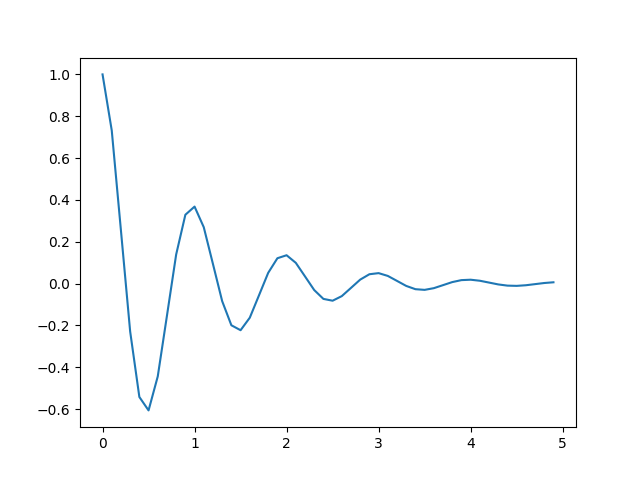

In [2]:
%matplotlib notebook 

def f(t):
    """A simple function"""
    return np.exp(-t) * np.cos(2*np.pi*t)

# Some time steps
t = np.arange(0.0, 5.0, 0.1)

# A simple plot
plt.figure()
plt.plot(t, f(t))
plt.show()

<IPython.core.display.Javascript object>


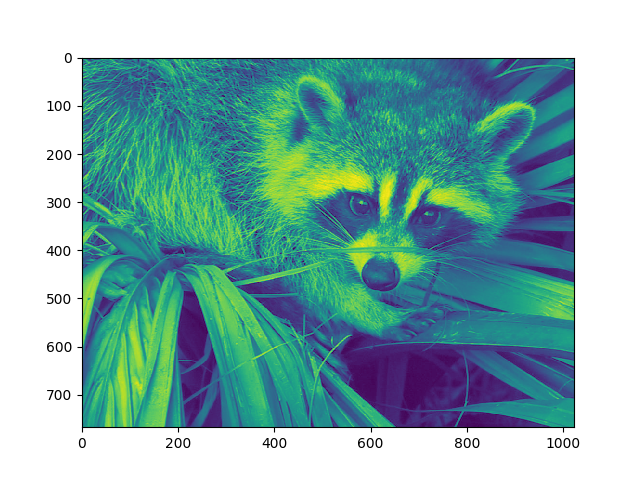

<IPython.core.display.Javascript object>


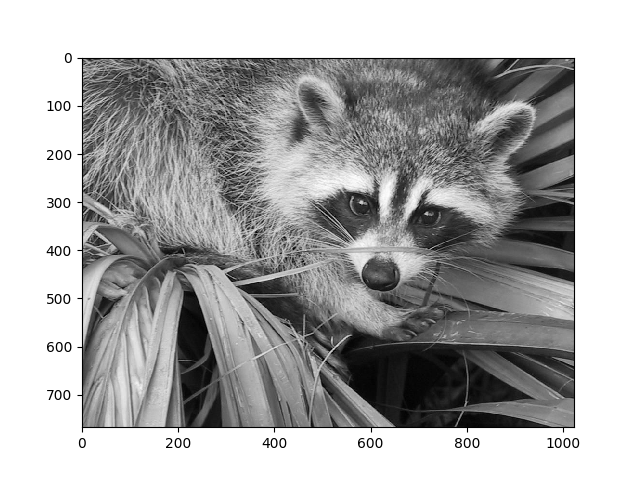

In [3]:
%matplotlib notebook 

# Get some data
from scipy import misc
face = misc.face(gray=True)

# By default the color map is wrong
plt.figure()
plt.imshow(face)
plt.show()

# But we can change it
plt.figure()
plt.imshow(face, cmap=plt.cm.gray)
plt.show()

<IPython.core.display.Javascript object>


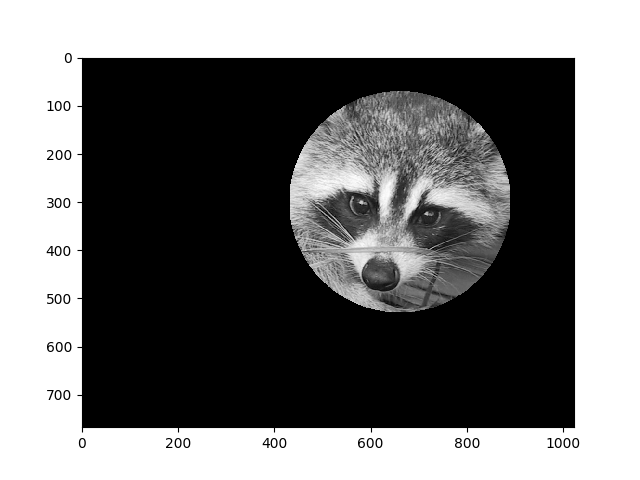

In [4]:
%matplotlib notebook 

# An image is a 2d Array (3d with for colored image)
# I need indices of pixels (x and y)
sy, sx = face.shape
y, x = np.mgrid[0:sy, 0:sx] 

# Approximate position of the face
centerx, centery = (660, 300) 

# Mask everything except a circle around the face
mask = ((y - centery)**2 + (x - centerx)**2) > 230**2
face[mask] = 0

# Plot the result
plt.figure()
plt.imshow(face, cmap=plt.cm.gray)    
plt.show()

In [5]:
# Load more data
data = np.loadtxt('populations.txt').astype(np.int)
print(data)

[[ 1900 30000  4000 48300]
 [ 1901 47200  6100 48200]
 [ 1902 70200  9800 41500]
 [ 1903 77400 35200 38200]
 [ 1904 36300 59400 40600]
 [ 1905 20600 41700 39800]
 [ 1906 18100 19000 38600]
 [ 1907 21400 13000 42300]
 [ 1908 22000  8300 44500]
 [ 1909 25400  9100 42100]
 [ 1910 27100  7400 46000]
 [ 1911 40300  8000 46800]
 [ 1912 57000 12300 43800]
 [ 1913 76600 19500 40900]
 [ 1914 52300 45700 39400]
 [ 1915 19500 51100 39000]
 [ 1916 11200 29700 36700]
 [ 1917  7600 15800 41800]
 [ 1918 14600  9700 43300]
 [ 1919 16200 10100 41300]
 [ 1920 24700  8600 47300]]


In [6]:
# Exo 1
# Extract each collumn into a specific array
years, hares, lynxes, carrots = data.T

# Copy the array without the year collumn
populations = data[:,1:]

# Compute for each species
# - the mean population
means           = populations.mean(axis=0)

# - the standard deviation
stds            = populations.std(axis=0)

# - The year when this species had it's maximum of population
max_populations = np.argmax(populations, axis=0)
max_years       = years[max_populations]

# - The two years when this species had it's minimum of population
lowest_2_pop    = np.argsort(populations, axis=0)[:2]
lowest_2_year   = years[lowest_2_pop]

# Print all that in an array

format_title = "{:<30} {:^10} | {:^10} | {:^10}"
format_array = "{:<30} {:^10.3e} | {:^10.3e} | {:^10.3e}"
print(format_title.format("", "Hares", "Lynxes", "Carrots"))
print(format_array.format("Mean:", *means))
print(format_array.format("Std:", *stds))
print(format_array.format("Max. year:",*max_years))
print(format_array.format("lowest populations year 1:", *lowest_2_year[0]))
print(format_array.format("lowest populations year 2:", *lowest_2_year[1]))

                                 Hares    |   Lynxes   |  Carrots  
Mean:                          3.408e+04  | 2.017e+04  | 4.240e+04 
Std:                           2.090e+04  | 1.625e+04  | 3.323e+03 
Max. year:                     1.903e+03  | 1.904e+03  | 1.900e+03 
lowest populations year 1:     1.917e+03  | 1.900e+03  | 1.916e+03 
lowest populations year 2:     1.916e+03  | 1.901e+03  | 1.903e+03 


In [7]:
# All years when at least one specie was above 50000

above_50000 = np.any(populations > 50000, axis=1)
print("Any above 50000:", years[above_50000])

Any above 50000: [1902 1903 1904 1912 1913 1914 1915]


In [8]:
# Dominants species throught the years

max_species = np.argmax(populations, axis=1)
species = np.array(['Hare', 'Lynx', 'Carrot'])

max_species=np.stack((years,species[max_species]),axis=1)
print("Max species:")
print(max_species)

Max species:
[['1900' 'Carrot']
 ['1901' 'Carrot']
 ['1902' 'Hare']
 ['1903' 'Hare']
 ['1904' 'Lynx']
 ['1905' 'Lynx']
 ['1906' 'Carrot']
 ['1907' 'Carrot']
 ['1908' 'Carrot']
 ['1909' 'Carrot']
 ['1910' 'Carrot']
 ['1911' 'Carrot']
 ['1912' 'Hare']
 ['1913' 'Hare']
 ['1914' 'Hare']
 ['1915' 'Lynx']
 ['1916' 'Carrot']
 ['1917' 'Carrot']
 ['1918' 'Carrot']
 ['1919' 'Carrot']
 ['1920' 'Carrot']]


<IPython.core.display.Javascript object>


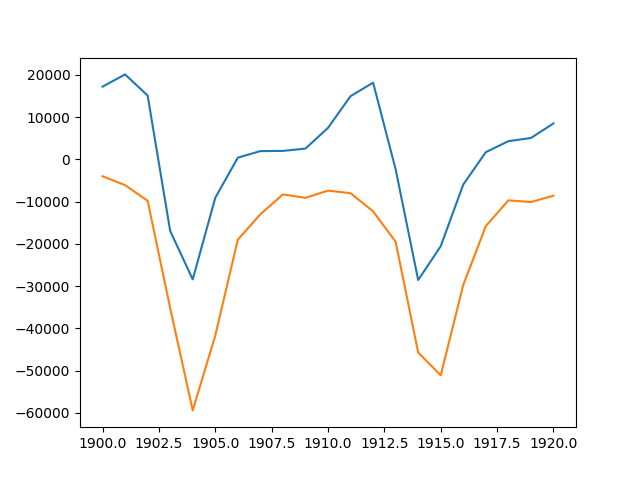

diff(Hares) vs. Lynxes correlation =  0.9179248480315341


In [9]:
%matplotlib notebook 

# Plot the variation of hares and lynxes
hare_grad = np.gradient(hares, 1.0)

plt.figure()
plt.plot(years, hare_grad)
plt.plot(years, -lynxes)
plt.show()

# Compute the correlation coeficient between the variation of hares and lynxes
print("diff(Hares) vs. Lynxes correlation = ", np.corrcoef(hare_grad, -lynxes)[0,1])

scikits
------
'Plugins' for scipy
http://scikits.appspot.com/scikits
e.g. scikit-image

pillow
------
- read and write images in a lot of format (tif, jpeg, ...)

Opencv
------
- image processing
- Usually scikit-image is better


More exemples
-----------------

<IPython.core.display.Javascript object>


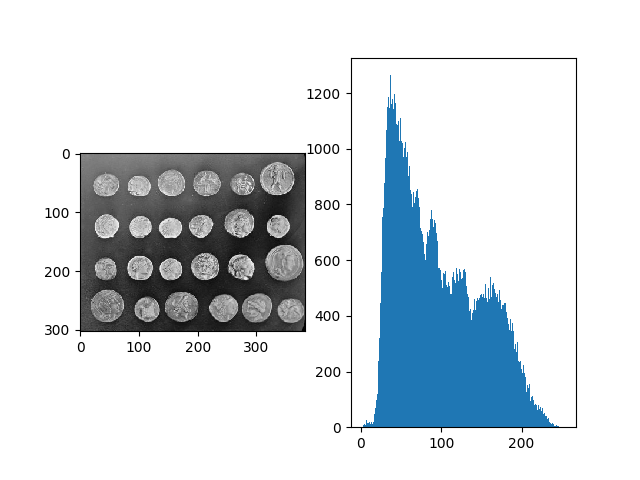

<IPython.core.display.Javascript object>


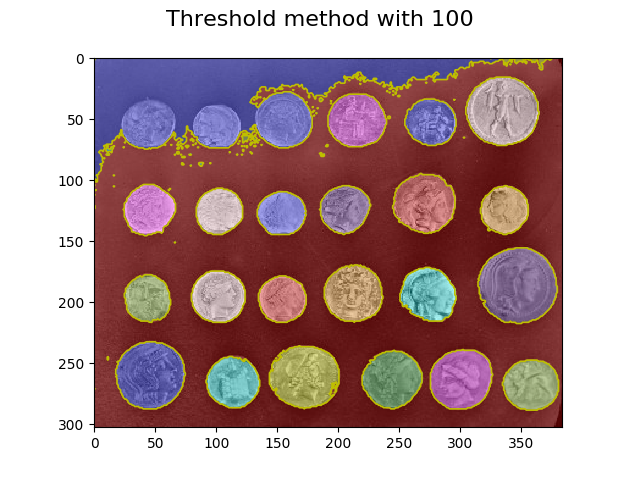

<IPython.core.display.Javascript object>


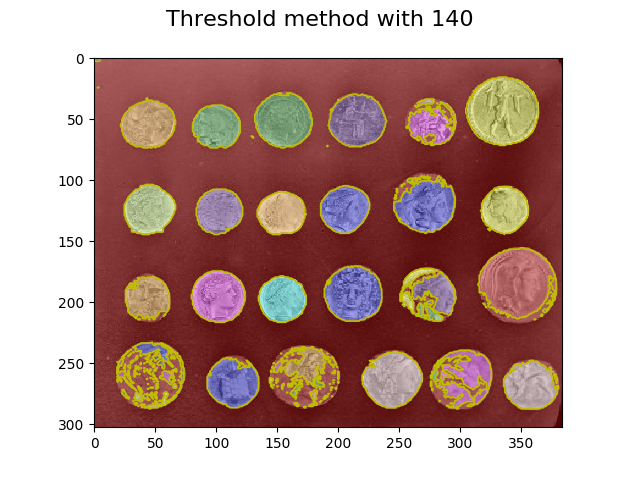

<IPython.core.display.Javascript object>


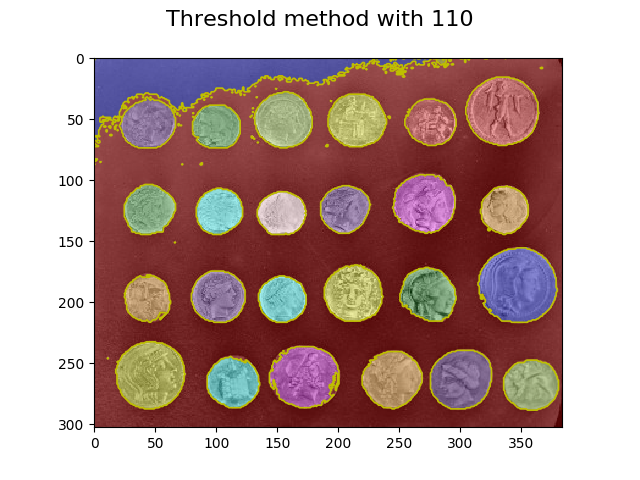

In [10]:
%matplotlib notebook 

from scipy import ndimage as ndi
from skimage import data
from skimage.color import label2rgb

# get data
coins = data.coins()

def plot_result(segmentation, title = ""):
    # Select a different color for each coin
    labeled_coins, _ = ndi.label(segmentation)
    image_label_overlay = label2rgb(labeled_coins, image=coins)
    
    fig = plt.figure()
    # The coins
    plt.imshow(coins, cmap=plt.cm.gray)
    # The edge of the segmentation
    plt.contour(segmentation, [0.5], linewidths=1.2, colors='y')
    # Each detected coin in a different color
    plt.imshow(image_label_overlay)
    
    if title:
        plt.suptitle(title, fontsize=16)
    plt.show()


def segmentation_with_threshold(datain, threshold):
    """ simple segmentation based on a threshold """
    coins = datain > threshold
    # binary_fill_holes is used to remove holes in the coins
    return ndi.binary_fill_holes(coins)


# Two plot side by side
# plot coins on the left one
fig, axes = plt.subplots(1,2)
axes[0].imshow(coins, cmap='gray')
# plot the histogram on the right
axes[1].hist(coins.flatten(), bins=np.arange(0, 256))
plt.show()

# simple extraction based on 3 different threshold
for threshold in [100,140,110]:
    segmentation = segmentation_with_threshold(coins, threshold)
    plot_result(segmentation, "Threshold method with {}".format(threshold))

<IPython.core.display.Javascript object>


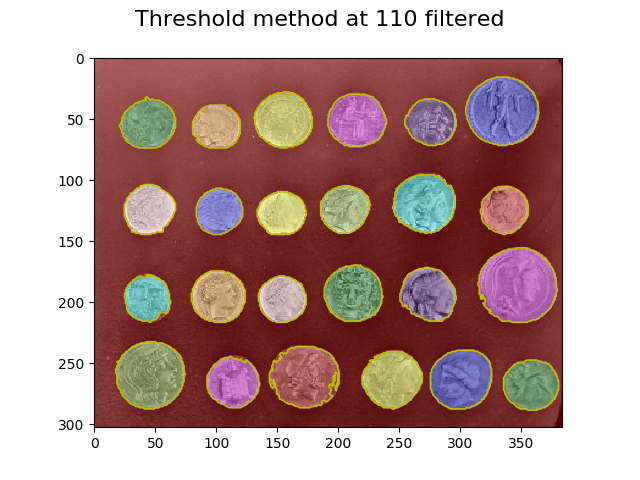

In [11]:
%matplotlib notebook 

def filter_small_objects(datain, threshold, biggest=False):
    """
    Segmentation based on edges
    1 - use label to labelize each zone
    2 - use bincount to count the number of pixel of each zone
    3 - select which zone to keep after filter
         - based on threshold
         - except background
         - eventually except biggest
    4 - apply filter
    """
    # label each zone
    label_objects, nb_labels = ndi.label(datain)
    # size of each zone in pixel
    sizes = np.bincount(label_objects.flatten())
    # Only keep all zone bigger than threshold
    mask_sizes = sizes > threshold
    
    # remove the background
    mask_sizes[0] = False
    
    if biggest:
        # remove the biggest zone (except background)
        mask_sizes[np.argmax(sizes)+1]=False
      
    #apply filter
    return mask_sizes[label_objects]  

segmentation = segmentation_with_threshold(coins, 110)
segmentation = filter_small_objects(segmentation,50,biggest=True)
plot_result(segmentation, "Threshold method at 110 filtered")

<IPython.core.display.Javascript object>


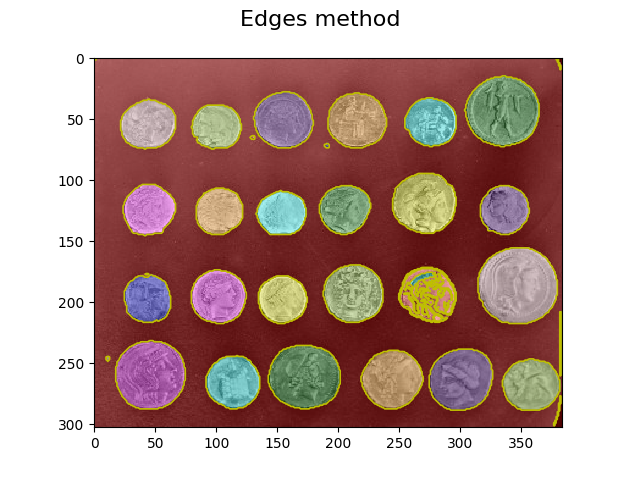

<IPython.core.display.Javascript object>


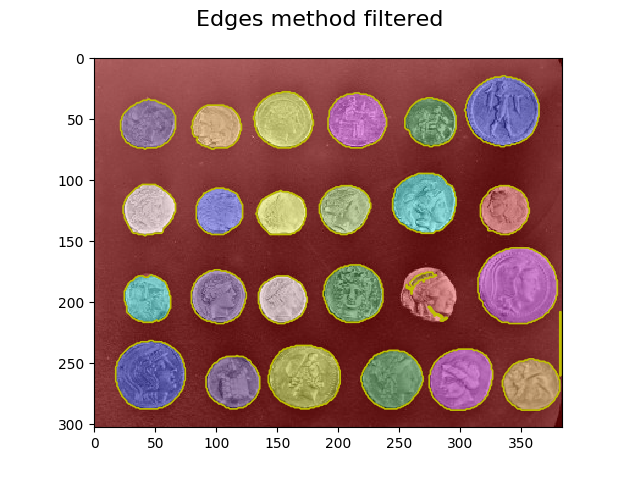

In [12]:
%matplotlib notebook 

from skimage.feature import canny

def segmentation_with_edges(datain):
    """ segmentation based on edges """
    return ndi.binary_fill_holes(canny(datain/255.))

segmentation = segmentation_with_edges(coins)
plot_result(segmentation, "Edges method")
segmentation_f = filter_small_objects(segmentation,20)
plot_result(segmentation_f, "Edges method filtered")

<IPython.core.display.Javascript object>


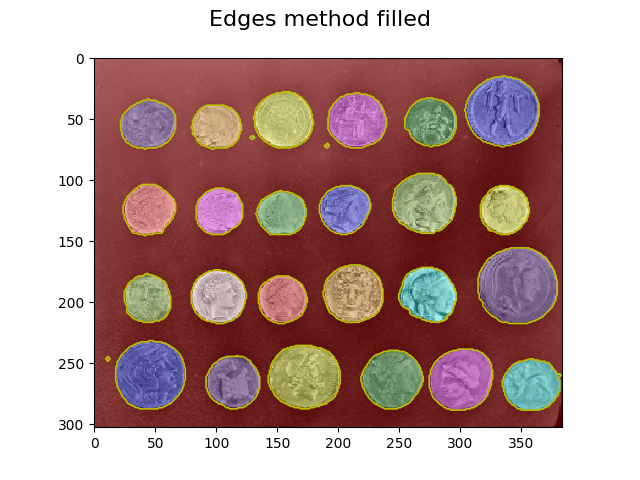

<IPython.core.display.Javascript object>


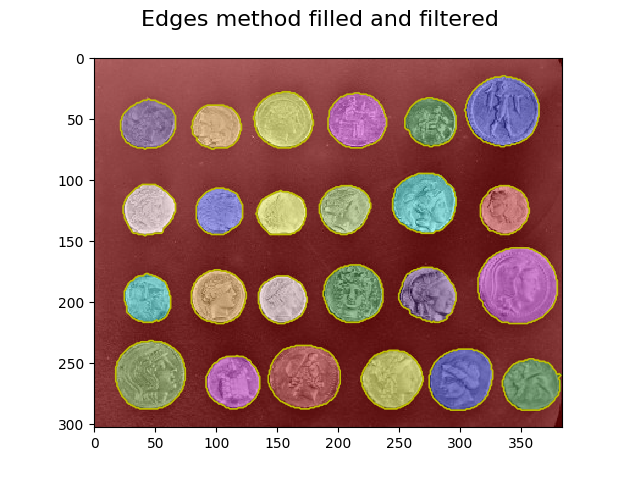

In [13]:
def filled(segmentation):
    # dilate
    segmentation_dil = ndi.morphology.binary_dilation(segmentation, iterations=1)
    # fill hole
    segmentation_filled = ndi.binary_fill_holes(segmentation_dil)
    # 2*erosion + dilate
    segmentation_ero = ndi.morphology.binary_erosion(segmentation_filled, iterations=2)
    segmentation_final = ndi.morphology.binary_dilation(segmentation_ero, iterations=1)
    return segmentation_final
    
segmentation_fill = filled(segmentation)
plot_result(segmentation_fill, "Edges method filled")
segmentation_fill_f = filter_small_objects(segmentation_fill,20)
plot_result(segmentation_fill_f, "Edges method filled and filtered")

<IPython.core.display.Javascript object>


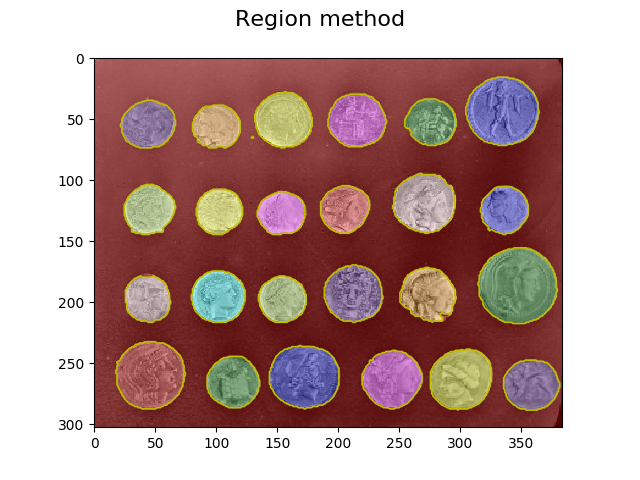

<IPython.core.display.Javascript object>


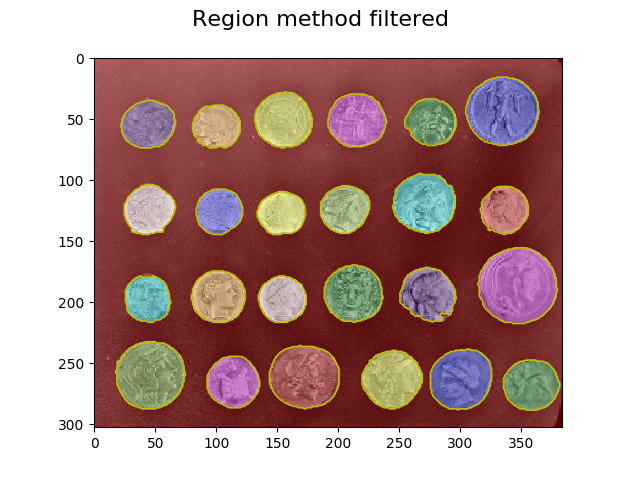

In [14]:
%matplotlib notebook 

from skimage.filters import sobel
from skimage.morphology import watershed

def segmentation_with_region(datain):
    """ segmentation based on region """

    # use sobel in order to compute elevation map
    elevation_map = sobel(datain)
    
    # mark pixels
    # 1 for background for sure
    # 2 for coins for sure
    # 0 for we don't know   
    markers = np.zeros_like(datain)
    markers[datain < 30] = 1
    markers[datain > 150] = 2
    
    # apply watershed algo
    segmentation = watershed(elevation_map, markers) - 1
    return ndi.binary_fill_holes(segmentation)         

segmentation = segmentation_with_region(coins)
plot_result(segmentation, "Region method")
segmentation = filter_small_objects(segmentation,20)
plot_result(segmentation, "Region method filtered")

<IPython.core.display.Javascript object>


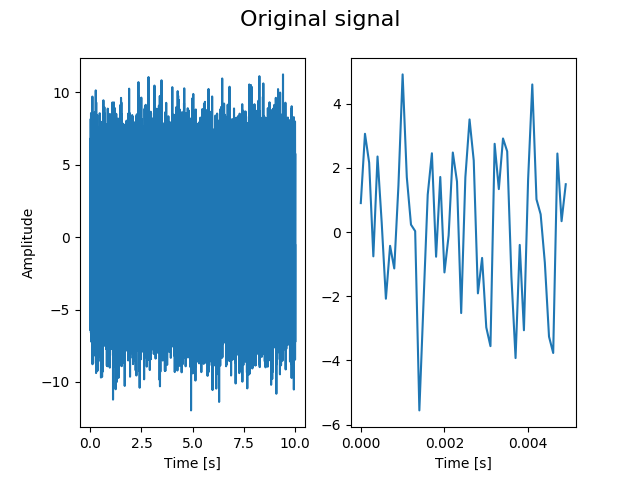

In [15]:
%matplotlib notebook 

# frequency of acquisition
fs = 10e3

def make_input():
    # number of time steps
    N = 1e5
    # amplitude of the signal
    amp = 2*np.sqrt(2)
    # main frequency
    freq = 1270.0
    # noise power
    noise_power = 0.001 * fs / 2
    
    # time scale
    time = np.arange(N) / fs
    
    # main signal
    x = amp*np.sin(2*np.pi*freq*time)
    # noise
    x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
    
    return time, x

def myplot_signal(time, signal, title=""):
    # two plots side by side
    fig, axes = plt.subplots(1, 2)
    # left full signal
    axes[0].plot(time,signal)
    axes[0].set_xlabel('Time [s]')
    axes[0].set_ylabel('Amplitude')

    # right zoom on the 50 first time steps
    axes[1].plot(time[:50],signal[:50])
    axes[1].set_xlabel('Time [s]')

    if title:
        plt.suptitle(title, fontsize=16)
        
    plt.show()

def myplot_spectrum(freqs, spectrum, title=""):
    # two plots side by side
    fig, axes = plt.subplots(1, 2)
    # left full signal
    axes[0].semilogy(freqs,spectrum)
    axes[0].set_xlabel('frequency [Hz]')
        
     # right zoom around the main freq
    zoom = (freqs > 1100) & (freqs < 1400)
    axes[1].semilogy(freqs[zoom],spectrum[zoom])
    axes[1].set_xlabel('frequency [Hz]')

    the_title=""
    if title:
        the_title += title + "\n"
        
     # Get the max freqency and write it on the plot        
    id = np.argmax(spectrum)
    the_title += "Max frequency : {}".format(freqs[id])
    plt.suptitle(the_title, fontsize=16)
    
    plt.show()
     
time, signal = make_input()
myplot_signal(time,signal, "Original signal")

<IPython.core.display.Javascript object>


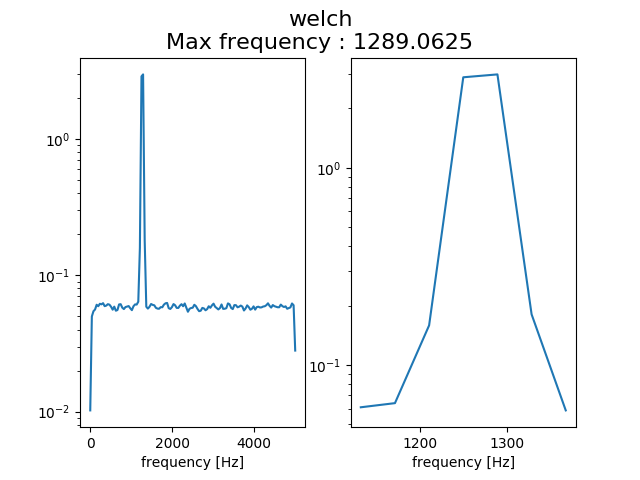

In [16]:
from scipy.signal import welch

Pwelch_freqs, Pwelch_spec = welch(signal, fs, scaling='spectrum')
myplot_spectrum(Pwelch_freqs, Pwelch_spec,"welch")

<IPython.core.display.Javascript object>


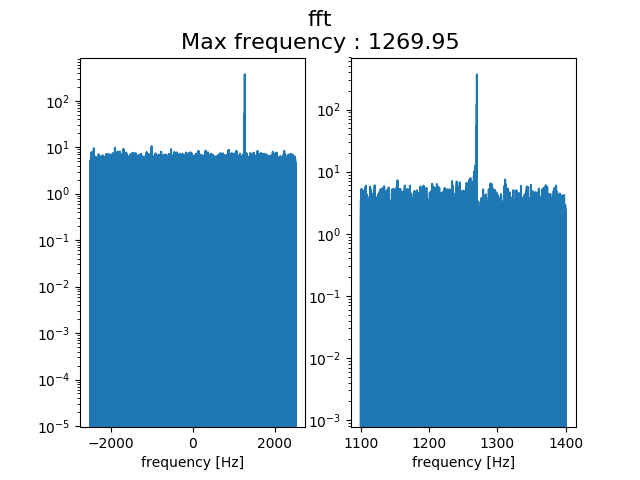

In [17]:
from scipy import fftpack

fft_spec = fftpack.dct(signal, norm='ortho')
fft_freqs = np.fft.fftfreq(len(time),2/fs)
myplot_spectrum(fft_freqs, fft_spec,"fft")

<IPython.core.display.Javascript object>


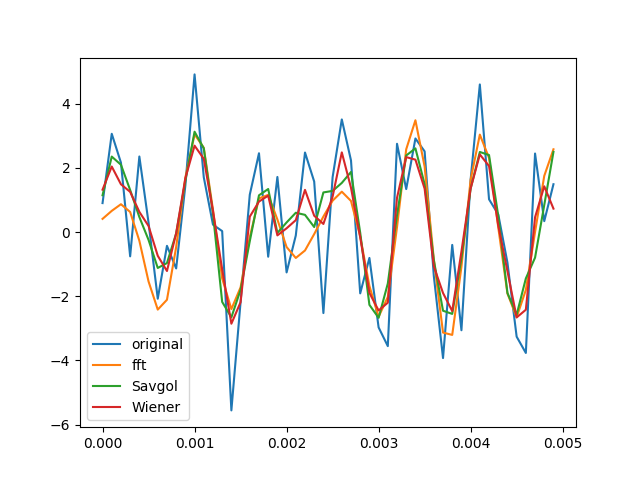

In [18]:
from scipy.signal import  savgol_filter, wiener

spect_fitered = fft_spec.copy()
spect_fitered[:25399-10000] = 0
spect_fitered[25399+10000:] = 0
filtered_fft = fftpack.idct(spect_fitered, norm='ortho')

plt.figure()
plt.plot(time[:50],signal[:50],label="original")
plt.plot(time[:50],filtered_fft[:50], label="fft")
plt.plot(time[:50],savgol_filter(signal,11,5)[:50], label="Savgol")
plt.plot(time[:50],wiener(signal)[:50], label="Wiener")
plt.legend()
plt.show()

In [19]:
from scipy import integrate

energy = integrate.simps(signal[:500]**2, x=time[:500])
print("Energy : {}".format(energy))

Energy : 0.4516039226092296


<IPython.core.display.Javascript object>


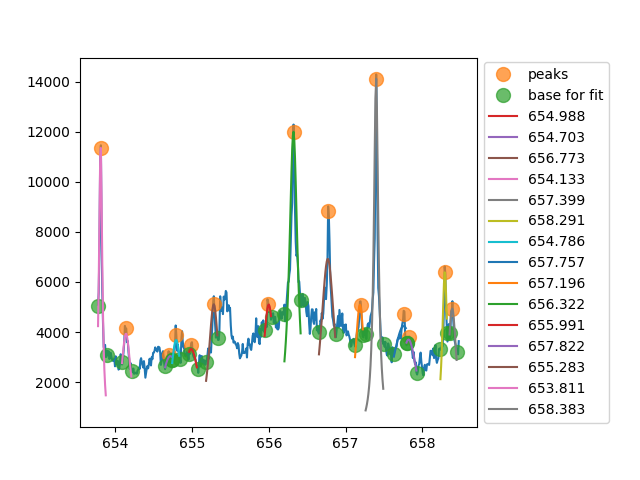

Baseline |   Gamma   | Amplitude | Peak      |  Initial peak
  -78.50 |  2.84e-01 |  3.40e+03 | 654.99    | 654.99   
  -18.53 |  3.28e-01 |  3.06e+03 | 654.72    | 654.70   
 -793.14 |  2.34e-01 |  7.71e+03 | 656.77    | 656.77   
 -114.92 |  1.60e-01 |  4.05e+03 | 654.14    | 654.13   
   -0.00 |  6.98e-02 |  1.41e+04 | 657.40    | 657.40   
   -0.01 |  8.03e-02 |  6.39e+03 | 658.29    | 658.29   
  -93.29 |  1.81e-01 |  3.77e+03 | 654.79    | 654.79   
 -231.93 |  4.16e-01 |  4.47e+03 | 657.76    | 657.76   
   -0.01 |  1.52e-01 |  5.09e+03 | 657.19    | 657.20   
   -0.00 |  1.31e-01 |  1.20e+04 | 656.32    | 656.32   
   -0.02 |  1.87e-01 |  5.10e+03 | 656.00    | 655.99   
  -44.32 |  2.91e-01 |  3.74e+03 | 657.82    | 657.82   
   -0.01 |  1.64e-01 |  5.11e+03 | 655.28    | 655.28   
   -0.01 |  5.14e-02 |  1.14e+04 | 653.81    | 653.81   
   -0.01 |  1.35e-01 |  4.93e+03 | 658.39    | 658.38   


In [20]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import peakutils
from detect_peaks import detect_peaks
import numpy as np
from scipy.signal import deconvolve, convolve, wiener,find_peaks_cwt
from scipy.optimize import minimize

def filter(wavelenght,signal):
    """Filter the signal in order to ease extraction of maxima"""
    return wiener(signal)
    #return signal

def find_peaks(wavelenght,signal):
    """Find a maximum of the signal peaks"""

    #indexes_max = [np.argmax(signal)]
    
    #indexes_max = find_peaks_cwt(filtered_signal, np.arange(1,10))
    #indexes_max = peakutils.indexes(filtered_signal, min_dist=1,thres=0.1)
    indexes_max = detect_peaks(filtered_signal)
   
    return indexes_max

def get_windows(wavelenght, signal, indexes_max):
    """
    Find out window of interest around peaks
    
    A window of iterest is the largest time range where
    - the signal is monotonicly increasing before the peak
    - the signal is monotonicly decreasign after the peak
    """
    windows = {}
    for peak in indexes_max:
        wmin = 0
        wmax = len(wavelenght)
        for i in range(peak,1,-1):
            if signal[i]<=signal[i-1]:
                wmin = i
                break

        for i in range(peak,len(wavelenght)-1):
            if signal[i]<=signal[i+1]:
                wmax = i
                break
                
        windows[peak] = [wmin, wmax]

    return windows

def filter_peaks(windows):
    """
    Filter out unusable peaks
    
    A peak is unusable when
    - the window is too short (less thant 10 values)
    - the peak is too close to an edge (we need a least 3 points)
    """
    filtered_windows = {}
    for peak,(wmin,wmax) in windows.items():
        if wmax- wmin >= 10 and wmax - peak >= 3 and peak - wmin >= 3:
            filtered_windows[peak] = [wmin,wmax]
    return filtered_windows

def get_minmaxpeaks(windows):
    """
    Extract a list of all extrema that we will use
    """
    limits = [i for window in windows.values()
                  for i in window]
    maxpeaks = list(windows.keys())
    return limits,  maxpeaks 
        
        
def lorentz_fit(wavelenght,signal,peak,window):
    """
    Compute a fit of a lorentz function around the peak inside a window
    1 - define a cost function (e.g. least square)
    2 - extract the window of interest
    3 - choose appropriate intital value on the 4 lorentz parameter
    4 - apply the minimize procedure to optimize those parameter
    HINT, bounds on the peaks position are mandatory
    5 - add the result on the plot
    """
    def lorentz(x):
        """
        Lorentz function
        x is a vector of  4 parameter
        """
        
        baseline, gamma,amplitude, x0 = x

        num = 2/(np.pi*gamma)
        denom = (1+((wavelenght-x0)/(gamma/2))**2)
        fx = num/denom
        
        maxlorentz = fx.max()
        
        return baseline + amplitude * fx / maxlorentz
    
    def cost(x):
        return np.sqrt(np.sum((lorentz(x)-signal)**2))
    
    wmin, wmax = window
    wavelenght=wavelenght[wmin:wmax]
    signal=signal[wmin:wmax]
    ipeak = peak-wmin
    
    
    x0=[0.,1.,signal[ipeak], wavelenght[ipeak]]
    
    opt = minimize(cost,x0,bounds=[(None,None),
                                   (None,None),
                                   (None,None),
                                   (wavelenght[max(ipeak-3,0)],wavelenght[min(ipeak+3,len(wavelenght))]),])
    fit = opt.x
    #print(opt)
    plt.plot(wavelenght,lorentz(fit),label=str(wavelenght[ipeak]))
    return fit


# get data
wavelenght, signal = np.loadtxt("Tungsten spectrum.dat").T

# filter signal
filtered_signal = filter(wavelenght,signal)

# Get peaks
maximas = find_peaks(wavelenght,filtered_signal)
windows = get_windows(wavelenght, filtered_signal, maximas)
peaks = filter_peaks(windows)

selected_limits, selected_maxpeaks = get_minmaxpeaks(peaks)

# start plot
fig= plt.figure()
ax = plt.subplot(111)
# plot the unfiltered signal
plt.plot(wavelenght,signal)
# add a circle on all the peaks
plt.plot(wavelenght[selected_maxpeaks],filtered_signal[selected_maxpeaks],'o', ms=10,alpha=0.7,label="peaks")
# add a circle on the limit of the windows
plt.plot(wavelenght[selected_limits],filtered_signal[selected_limits],'o', ms=10,alpha=0.7,label="base for fit")

# apply fit on all peaks
# and write the table
# and add the fit on the plot
print("{:^8} | {:^9} | {:^9} | {:<9} | {:<9}".format("Baseline","Gamma","Amplitude", "Peak", " Initial peak"))
for key, window in peaks.items():
    fit = lorentz_fit(wavelenght,filtered_signal,key,window)
    print("{:8.2f} | {:9.2e} | {:9.2e} | {:<9.2f} | {:<9.2f}".format(*fit, wavelenght[key]))

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
fig.savefig('lorentz_fit.svg', format='svg')

In [21]:
%matplotlib notebook 

from scipy import integrate

def tank(t, y):
    """
    Dynamic balance for a CSTR
 
    C_A = y[0] = the concentration of A in the tank, [mol/L]
    T   = y[1] = the tank temperature, [K]
 
    Returns dy/dt = [F/V*(C_{A,in} - C_A) - k*C_A^2       ]
                    [F/V*(T_in - T) - k*C_A^2*HR/(rho*Cp) ]
    """
    F = 20.1     # L/min
    CA_in = 2.5  # mol/L
    V = 100.0    # L
    k0 = 0.15    # L/(mol.min)
    Ea = 5000    # J/mol
    R = 8.314    # J/(mol.K)
    Hr = -590    # J/mol
    T_in = 288   # K
    rho = 1.050  # kg/L
 
    # Assign some variables for convenience of notation
    CA = y[0]
    T  = y[1]
 
    # Algebraic equations
    k = k0 * np.exp(-Ea/(R*T))  # L/(mol.min)
    Cp = 4.184 - 0.002*(T-273)  # J/(kg.K)
 
    # Output from ODE function must be a COLUMN vector, with n rows
    n = len(y)      # 2: implies we have two ODEs
    dydt = np.zeros((n))
    dydt[0] = F/V*(CA_in - CA) - k*CA**2
    dydt[1] = F/V*(T_in - T) - (Hr*k*CA**2)/(rho*Cp)
    return dydt
 
def solve_tank():
    # Start by specifying the integrator:
    # use ``vode`` with "backward differentiation formula"
    r = integrate.ode(tank).set_integrator('vode', method='bdf')
 
    # Set the time range
    t_start = 0.0
    t_final = 45.0
    delta_t = 0.1
    # Number of time steps: 1 extra for initial condition
    num_steps = int((t_final - t_start)/delta_t) + 1
 
    # Set initial condition(s): for integrating variable and time!
    CA_t_zero = 0.5
    T_t_zero = 295.0
    r.set_initial_value([CA_t_zero, T_t_zero], t_start)
 
    # Create vectors to store trajectories
    t = np.zeros(num_steps)
    CA = np.zeros(num_steps)
    temp = np.zeros(num_steps)
 
    # Integrate the ODE(s) across each delta_t timestep
    k = 0
    while r.successful() and k < num_steps:
        # Store the results to plot later
        t[k] = r.t
        CA[k] = r.y[0]
        temp[k] = r.y[1]
        
        r.integrate(r.t + delta_t)
        k += 1

 
    # All done!  Plot the trajectories in two separate plots:
    fig = plt.figure()
    ax1 = plt.subplot(211)
    ax1.plot(t[:k], CA[:k])
    ax1.set_xlim(t_start, t_final)
    ax1.set_xlabel('Time [minutes]')
    ax1.set_ylabel('Concentration [mol/L]')
    ax1.grid('on')
 
    ax2 = plt.subplot(212)
    ax2.plot(t[:k], temp[:k], 'r')
    ax2.set_xlim(t_start, t_final)
    ax2.set_xlabel('Time [minutes]')
    ax2.set_ylabel('Temperaturere [K]')
    ax2.grid('on')

<IPython.core.display.Javascript object>


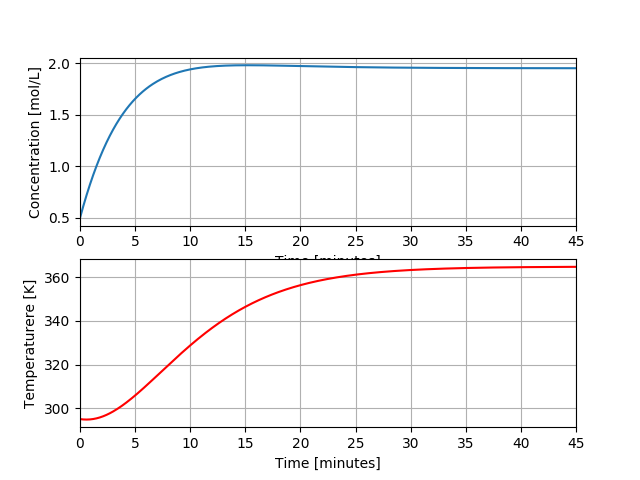

In [22]:
solve_tank()

sympy
-----
Calcul symbolique en python


f(x)
⌠           
⎮     ___   
⎮    ╱ 1    
⎮   ╱  ─  dx
⎮ ╲╱   x    
⌡           
                      2               
         d           d                
f(x) - 2⋅──(f(x)) + ───(f(x)) = sin(x)
         dx           2               
                    dx                
                    x   cos(x)
f(x) = (C₁ + C₂⋅x)⋅ℯ  + ──────
                          2   


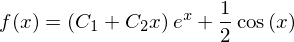

In [23]:
import sympy as sp
sp.init_printing()
x = sp.symbols('x')
f = sp.symbols('f', cls=sp.Function)
print(f(x))
sp.pprint(sp.Integral(sp.sqrt(1/x),x))
diffeq = sp.Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sp.sin(x))
sp.pprint(diffeq)
sol = sp.dsolve(diffeq, f(x),dict=True)
sp.pprint(sol)
sol

In [24]:
C1,C2 = sp.symbols('C1 C2')
sol.subs({x:2,C1:0,C2:3}).evalf()


pandas
------
- largement basé sur numpy
- permet de faire du traitement 'à la excel'